In [23]:
import os
import pickle
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [24]:
sns.set_theme(style="whitegrid")

In [25]:
try:
    BASEDIR = os.path.abspath(os.path.dirname(__file__))
except NameError:
    BASEDIR = os.getcwd()

DBPATH = os.path.join(BASEDIR, "db.sqlite3")

#### Carregamento dos dados

In [26]:
engine = create_engine("sqlite:///" + DBPATH)

In [27]:
with engine.connect() as conn:
    df = pd.read_sql_table("dados", con=conn)

#### Detalhe dos dados

In [28]:
df.head()

,id,nota_exame_ingles,qi,nota_exame_psicotecnico,admitido
0,1,5.41,115,54,0
1,2,7.36,105,77,1
2,3,7.76,96,62,1
3,4,5.51,112,51,0
4,5,7.19,97,47,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       300 non-null    int64  
 1   nota_exame_ingles        300 non-null    float64
 2   qi                       300 non-null    int64  
 3   nota_exame_psicotecnico  300 non-null    int64  
 4   admitido                 300 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 11.8 KB


In [30]:
df.shape

(300, 5)

In [31]:
df.isna().sum()

id                         0
nota_exame_ingles          0
qi                         0
nota_exame_psicotecnico    0
admitido                   0
dtype: int64

In [32]:
df.drop("id", axis=1, inplace=True)

#### Exploratória

In [33]:
df["admitido"].value_counts()

admitido
1    152
0    148
Name: count, dtype: int64

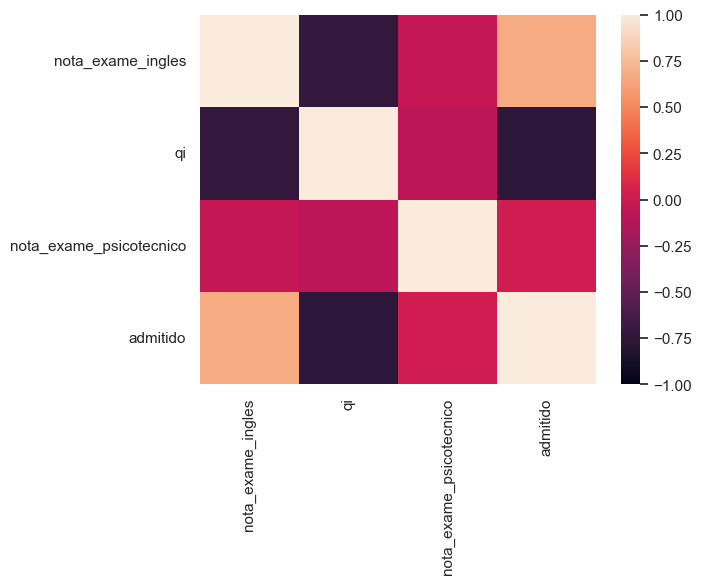

In [34]:
sns.heatmap(df.corr(), vmin=-1, vmax=1)
plt.show()

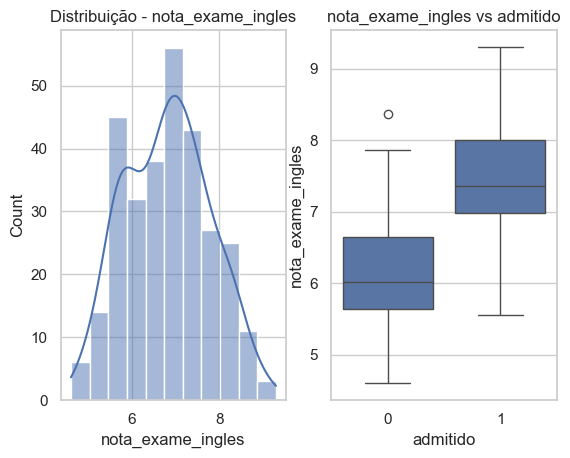

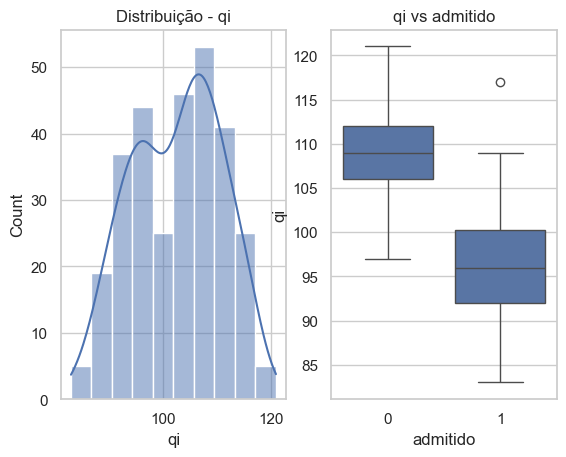

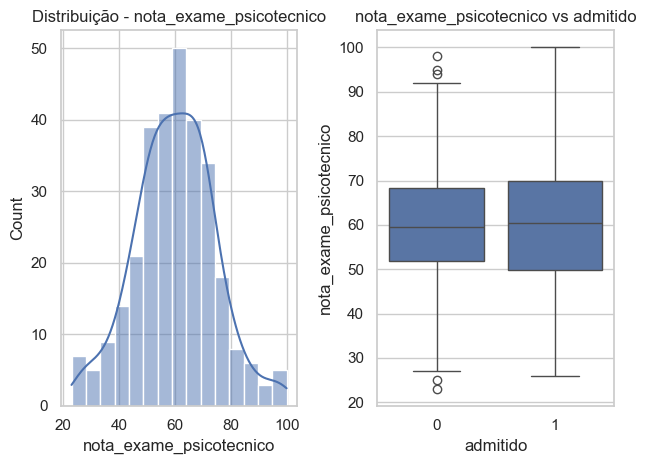

In [35]:
for col in df.columns.drop("admitido"):
    fig, axes = plt.subplots(1, 2)
    sns.histplot(df[col], kde=True, ax=axes[0])
    sns.boxplot(df, x="admitido", y=col, ax=axes[1])
    axes[0].set_title(f"Distribuição - {col}")
    axes[1].set_title(f"{col} vs admitido")

plt.tight_layout()
plt.show()

#### Pré-processamento

In [36]:
X = df.drop("admitido", axis=1)
y = df["admitido"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2
)

In [38]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# salvando o scaler

pickle.dump(scaler, open(os.path.join(BASEDIR, "artifacts", "scaler.pkl"), "wb"))